# 🧠 Stochastic Gradient Descent (SGD)

*Czyli jak działa uczenie modeli w praktyce?*

## 🔦 Intuicja: Uczenie się we mgle
Wyobraź sobie, że schodzisz z góry w gęstej mgle z latarką. Nie widzisz całej drogi — tylko jej fragment.

To właśnie robi algorytm **SGD**: podejmuje decyzje na podstawie lokalnych informacji.

![output-onlinejpgtools](https://i.ibb.co/tTFdkzDD/resized-image.png)

## ⚙️ Algorytm SGD — krok po kroku
```python
for epoch in range(n_epochs):
    for x_i, y_i in training_data:
        grad = compute_gradient(w, x_i, y_i)
        w = w - learning_rate * grad
```

## 🔥 Regresja Logistyczna - wielki powrót

Zobaczmy teraz jak nasz algorytm sprawdza się w tym co robiliśmy dzisiaj rano - znajdywania idealnej prostej.

Spróbujmy to zaimplementować!

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df = df[['age', 'fare', 'survived']].dropna()
X = df[['age', 'fare']].values
y = df['survived'].values

# Normalizacja cech
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

# Dodaj kolumnę z jedynkami (bias)
X_b = np.c_[np.ones((X_norm.shape[0], 1)), X_norm]

Epoka 0, koszt: 1.1824


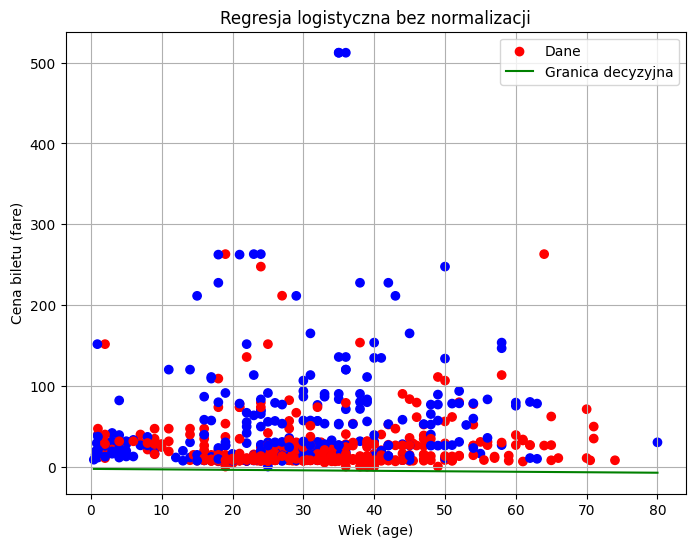

Epoka 10, koszt: 1.1102


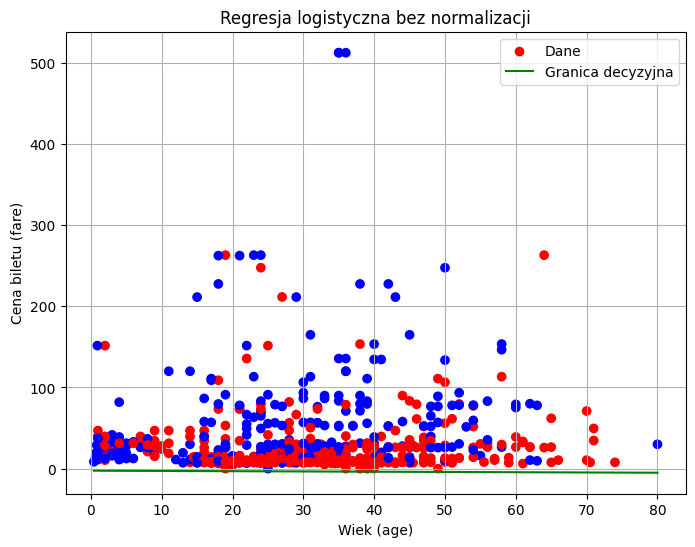

Epoka 20, koszt: 1.0450


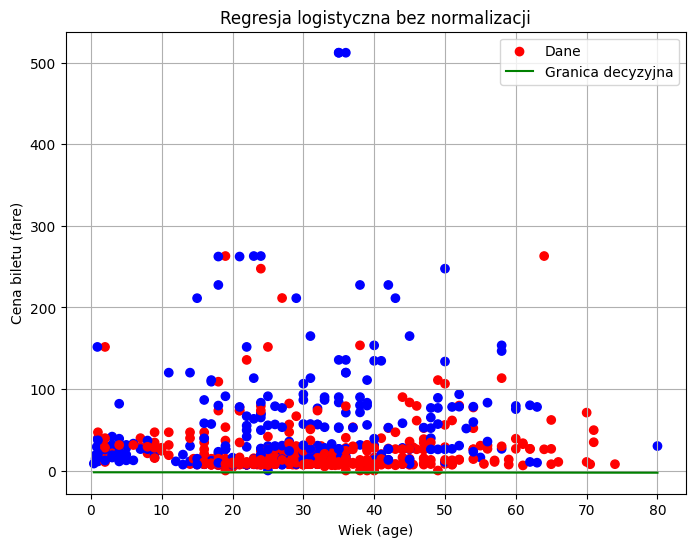

Epoka 30, koszt: 0.9867


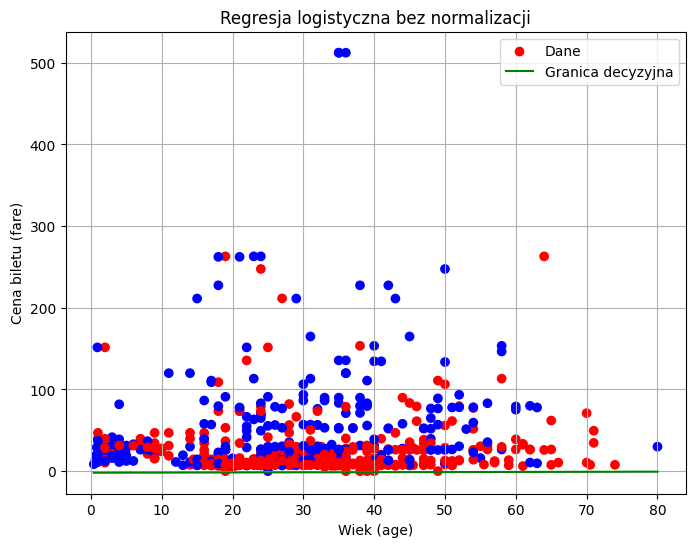

Epoka 40, koszt: 0.9352


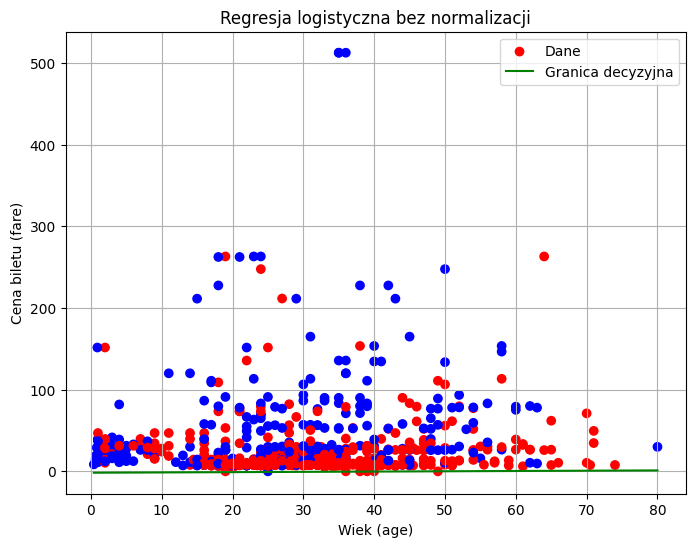

Epoka 50, koszt: 0.8900


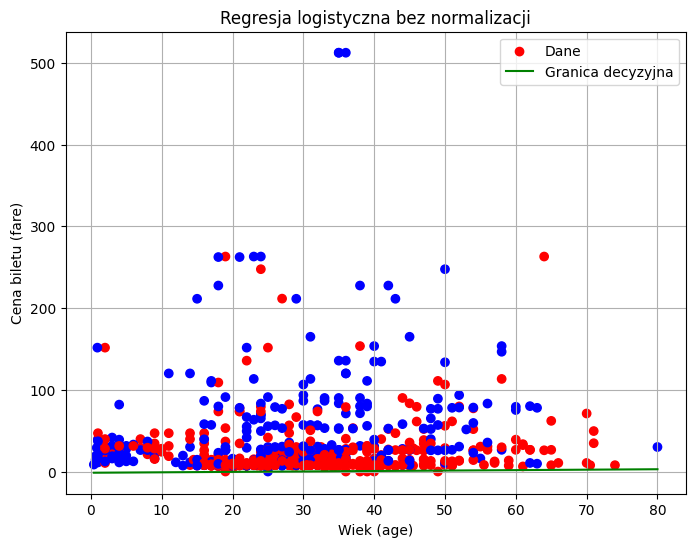

Epoka 60, koszt: 0.8507


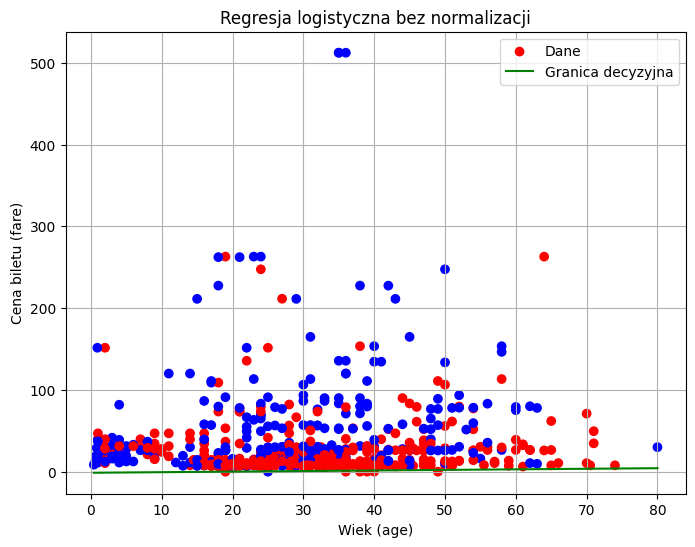

Epoka 70, koszt: 0.8167


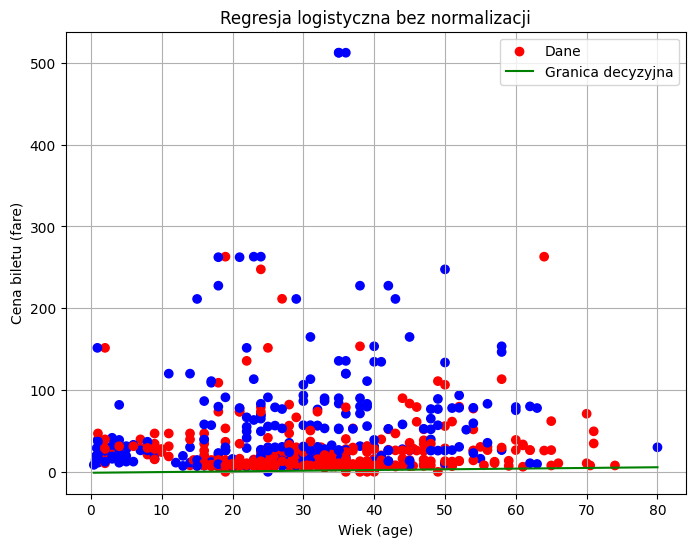

Epoka 80, koszt: 0.7875


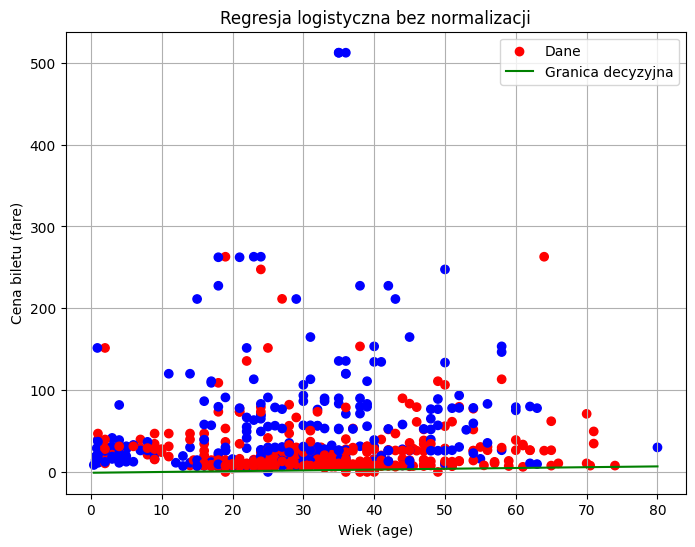

Epoka 90, koszt: 0.7626


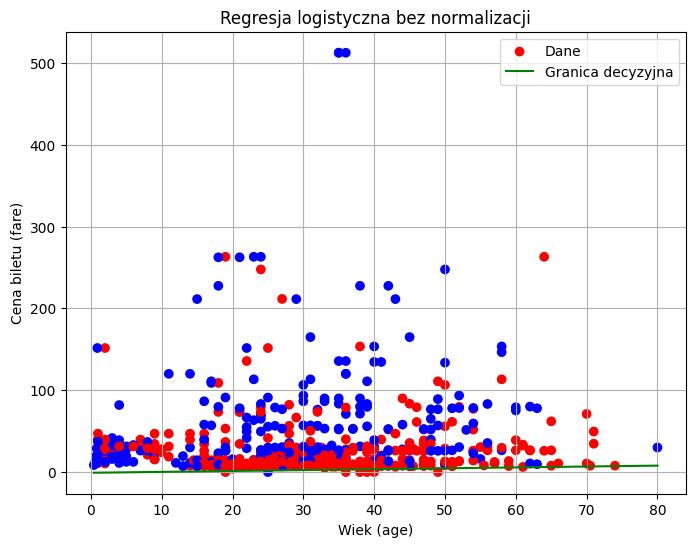


Parametry modelu po treningu:
w₀ (bias): 0.6716, w₁ (age): -0.1038, w₂ (fare): 0.8745


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# Funkcja kosztu
def compute_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


# Funkcja do wizualicji
def show_plot():
    plt.figure(figsize=(8, 6))
    colors = ['red' if label == 0 else 'blue' for label in y]
    plt.scatter(X[:, 0], X[:, 1], c=colors, label='Dane')
    x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_values = -(weights[0] + weights[1] * x_values) / weights[2]
    plt.plot(x_values, y_values, color='green', label='Granica decyzyjna')
    plt.xlabel('Wiek (age)')
    plt.ylabel('Cena biletu (fare)')
    plt.title('Regresja logistyczna')
    plt.legend()
    plt.grid(True)
    plt.show()


weights = np.random.randn(X_b.shape[1])  # Losowe wartości początkowe dla wag

# Hiperparametry
learning_rate = 0.00005
epochs = 100

# Pętla treningowa
for epoch in range(epochs):
    for xi, yi in zip(X_b, y):
        activation = np.dot(xi, weights)  # liczymy naszą sumę
        y_pred = sigmoid(activation)      # nakładamy funkcję sigmoid

        # poniżej jest liczenie gradientu oraz aktualizacja wag
        error = y_pred - yi
        gradient = error * xi
        weights -= learning_rate * gradient

    activation_all = np.dot(X_b, weights)
    y_pred_all = sigmoid(activation_all)
    loss = compute_loss(y, y_pred_all)
    if epoch % 10 == 0:
        print(f"Epoka {epoch}, koszt: {loss:.4f}")
        show_plot()

# Wyniki
print(f"\nParametry modelu po treningu:\nw₀ (bias): {weights[0]:.4f}, w₁ (age): {weights[1]:.4f}, w₂ (fare): {weights[2]:.4f}")


## 📉 Gradient jako kierunek spadku
Pochodna mówi nam, w którą stronę iść, aby zmniejszyć błąd (funkcję kosztu).

SGD używa **pojedynczego przykładu** w każdej aktualizacji, dlatego jego droga jest bardziej „szarpana”, ale szybka.

### 🎯 Globalne vs lokalne minimum

SGD może pomóc przeskoczyć lokalne minima — to jakbyś potknął się i przez przypadek trafił do lepszej doliny

![SGD_koszt](https://davidmatablog.wordpress.com/wp-content/uploads/2017/08/localminima.png?w=1000)

## 📘 Batch Gradient Descent (Ciekawostka)
### 🔍 Czym jest Batch Gradient Descent?
Batch Gradient Descent to algorytm optymalizacji używany do minimalizacji funkcji kosztu w modelach uczenia maszynowego. W przeciwieństwie do Stochastic Gradient Descent (SGD), który aktualizuje parametry modelu na podstawie pojedynczych przykładów, BGD wykorzystuje cały zbiór treningowy do obliczenia gradientu i aktualizacji parametrów w każdej iteracji.

### 🆚 Batch Gradient Descent vs SGD
| Cecha      | Batch Gradient Descent | SGD               |
|------------|------------------------|-------------------|
| Dane       | Wszystkie naraz        | 1 przykład na raz |
| Prędkość   | Wolniejszy             | Szybszy           |
| Stabilność | Stabilny               | Szarpany          |


## ❓ Pytania dla publiczności
- Dlaczego losowość może być pomocna?
- Czy zawsze chcemy być dokładni, czy raczej szybcy?
- Co się stanie, gdy learning rate będzie za duży?